# Data acquisition y Data Wrangling
En este ejercicio aplicaremos los conocimientos aprendidos hasta el momento de adquisición de datos y de data wrangling.

## Juan Manuel González Ascencio - A00572003

In [58]:
# Importa aqui las librerias necesarias para tu practica
import pandas as pd
import sqlite3
#pip install missingno
import missingno as msno


## Parte 1 - Lectura:
Consultas SQL

### Consulta 1
(10 pts)


Crea una conexión a la base `nba_salary.sqlite`. Carga a un dataframe registros de salarios del equipo Houston (*HOU*).

In [59]:
conexion = sqlite3.connect('nba_salary.sqlite')
cursor = conexion.cursor()

#Registros de salarios del equipo houston 
query = "SELECT * FROM nba_season1718_salary WHERE tm = 'HOU'"
df = pd.read_sql_query(query, conexion)
df

,X1,Player,Tm,season17_18
0,9.0,James Harden,HOU,28299399.0
1,18.0,Chris Paul,HOU,24599495.0
2,42.0,Ryan Anderson,HOU,19578455.0
3,92.0,Eric Gordon,HOU,12943020.0
4,148.0,P.J. Tucker,HOU,7590035.0
5,153.0,Trevor Ariza,HOU,7420912.0
6,238.0,Nene Hilario,HOU,3477600.0
7,248.0,Tarik Black,HOU,3290000.0
8,290.0,Clint Capela,HOU,2334520.0
9,320.0,Luc Mbah a Moute,HOU,2116955.0


### Consulta 2

(10 pts)

Carga a un dataframe solo los nombres, equipos y salarios de jugadores con salario mayor que 10 millones de dólares.

In [60]:
query = "SELECT Player, tm as Team, season17_18 as Salary FROM nba_season1718_salary WHERE season17_18 > 10000000"
df = pd.read_sql_query(query, conexion)
df

,Player,Team,Salary
0,Stephen Curry,GSW,34682550.0
1,LeBron James,CLE,33285709.0
2,Paul Millsap,DEN,31269231.0
3,Gordon Hayward,BOS,29727900.0
4,Blake Griffin,DET,29512900.0
...,...,...,...
117,Mirza Teletovic,MIL,10500000.0
118,Bojan Bogdanovic,IND,10500000.0
119,Jon Leuer,DET,10497319.0
120,Iman Shumpert,SAC,10337079.0


### Consulta 3
(10 pts)

Extrae las siguientes estadísticas correspondientes al año 2017:
* Promedio de edad (AGE)
* Mínimo de puntos (PTS)
* Máximo de puntos

In [61]:
#Extrae las siguientes estadísticas correspondientes al año 2017
query = "SELECT AVG(Age) as Average_age, MAX(PTS) as Puntos_maximos, MIN(PTS) as Puntos_Minimos FROM Seasons_Stats WHERE Year = 2017"
df = pd.read_sql_query(query, conexion)
df

,Average_age,Puntos_maximos,Puntos_Minimos
0,26.406723,2558.0,0.0


### Consulta 4
(10 pts)
Carga a un dataframe los mínimos, promedios y máximos de salarios por equipo.

In [62]:
query = "SELECT tm as Team, MIN(season17_18) as Min_salary, AVG(season17_18) as Average_salary, MAX(season17_18) as Max_salary FROM nba_season1718_salary GROUP BY tm"
df = pd.read_sql_query(query, conexion)
df

,Team,Min_salary,Average_salary,Max_salary
0,ATL,26773.0,3.711770e+06,16910113.0
1,BOS,83129.0,6.765292e+06,29727900.0
2,BRK,50000.0,5.335543e+06,19332500.0
3,CHI,17224.0,3.726043e+06,15550000.0
4,CHO,815615.0,8.373440e+06,23500000.0
5,CLE,46080.0,9.806325e+06,33285709.0
6,DAL,46080.0,3.900971e+06,23112004.0
7,DEN,1471382.0,6.743069e+06,31269231.0
8,DET,25000.0,6.004305e+06,29512900.0
9,GSW,815615.0,8.593428e+06,34682550.0


### Consulta 5 - Carga a dataframes
(10 pts)

Extrae sus tablas a un dataframe y muestra 5 registros de cada una (utiliza nombres explicativos).

In [63]:
query = "SELECT X1, Player, Tm as Team, season17_18 as Salary FROM nba_season1718_salary"
Salarios = pd.read_sql_query(query, conexion)
Salarios.head()


,X1,Player,Team,Salary
0,1.0,Stephen Curry,GSW,34682550.0
1,2.0,LeBron James,CLE,33285709.0
2,3.0,Paul Millsap,DEN,31269231.0
3,4.0,Gordon Hayward,BOS,29727900.0
4,5.0,Blake Griffin,DET,29512900.0


In [64]:
query = "SELECT * FROM Seasons_Stats"
Estadisticas = pd.read_sql_query(query, conexion)
Estadisticas.head()

,X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2.0,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3.0,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4.0,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


## Parte 2 - Limpieza

(5 pts)
Muestra cuántos datos nulos tiene cada tabla.

In [65]:
#Muestra cuántos datos nulos tiene cada tabla
print(Salarios.isnull().sum())

X1        0
Player    0
Team      0
Salary    0
dtype: int64


In [66]:
print(Estadisticas.isnull().sum())

X1            0
Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS        18444
MP          553
PER         590
TS%         153
3PAr      21239
FTr         166
ORB%      23714
DRB%      24320
TRB%      24436
AST%      23926
STL%      22672
BLK%      21652
TOV%      24241
USG%      24633
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM      24191
DBPM      23975
BPM       24279
VORP      21604
FG           67
FGA          67
FG%         166
3P        16021
3PA       19516
3P%       20893
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB       23158
DRB       23956
TRB         379
AST          67
STL       22794
BLK       21000
TOV       23761
PF           67
PTS          67
dtype: int64


### Visualización
(5 pts)
Muestra alguna visualización para los valores faltantes en la tabla de salarios.

<Axes: >

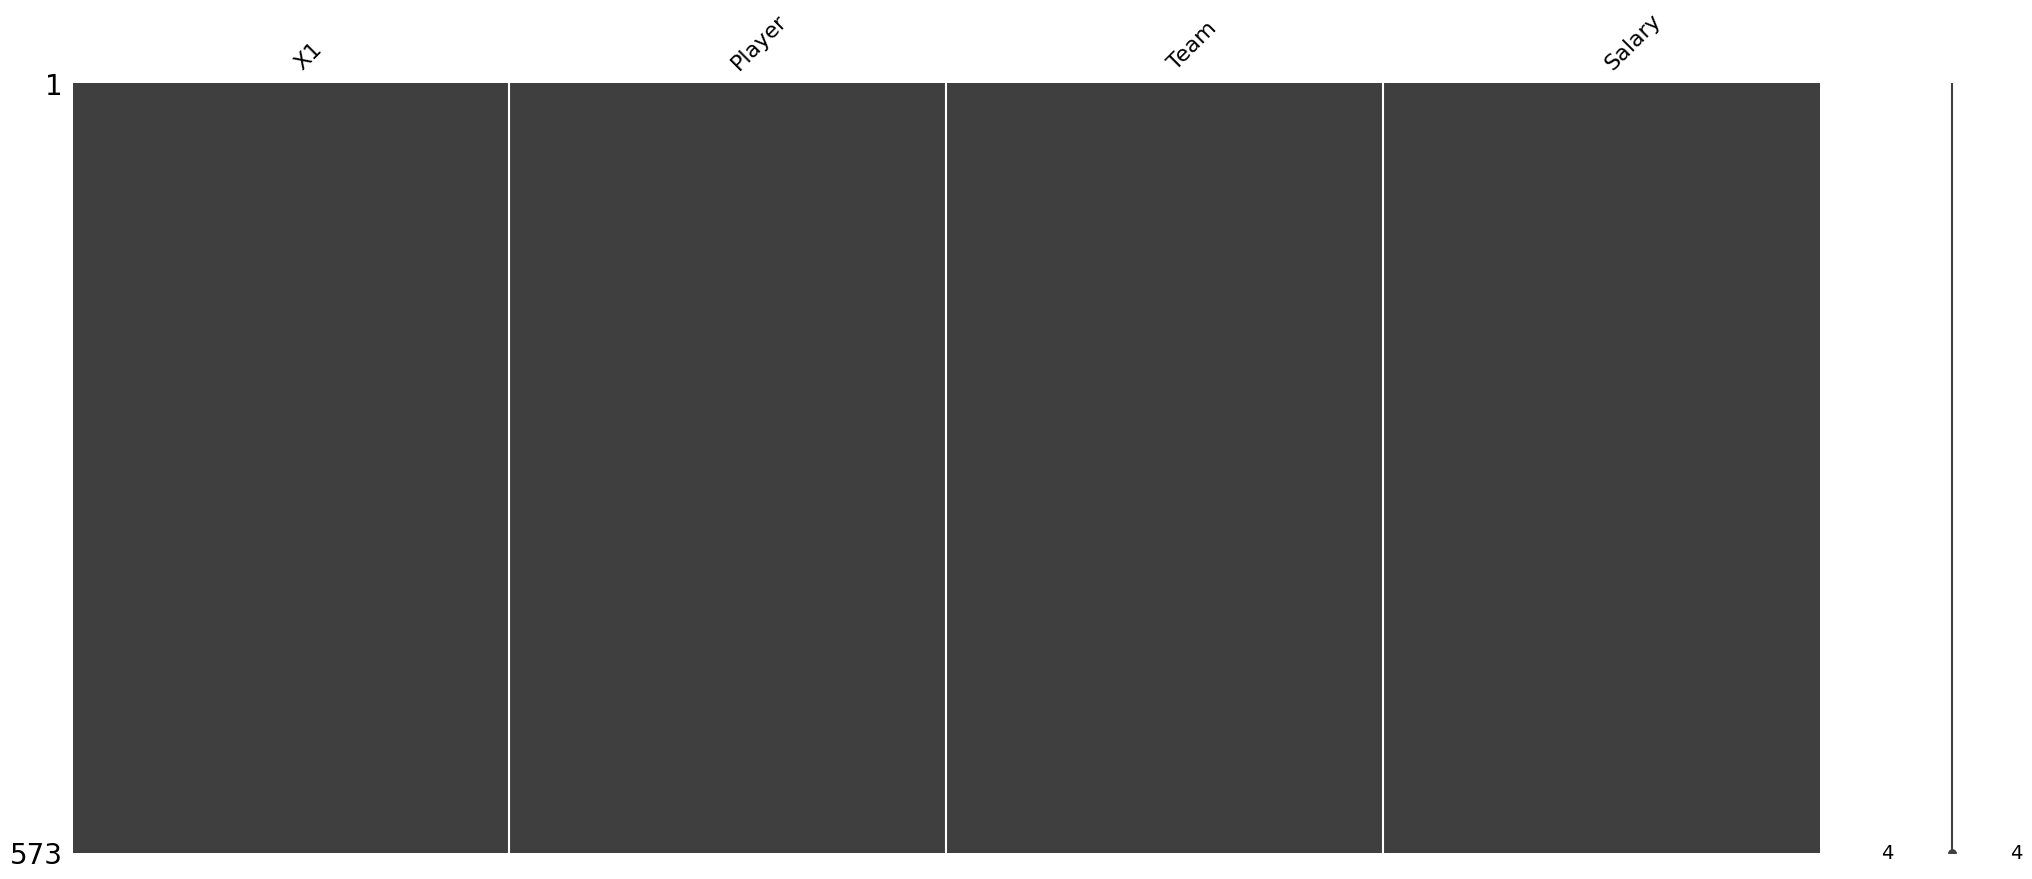

In [67]:
msno.matrix(Salarios)

### Analiza que columnas y filas eliminar, responde y justifica
(5 pts)
* Debemos borrar filas de `df_sal`? 
* Debemos borrar columnas de `df_sal`?

Segun tu respuesta, realiza las modificaciones al dataframe (15 pts).

### Respuesta

Podríamos borrar la primer columna llamada x1, ya que funge como indice pero al tenerlo en un dataframa nos incluye otro indice, por lo que no nos da ningún valor tenerla.

Fuera de eso, no es necesario borrar ni filas ni columnas de df_sal (o salarios como lo tengo yo), ya que es una tabla que no contiene datos nulos ni información que nos pueda perjudicar.

In [68]:
#Borramos la columna x1 de Salarios
Salarios = Salarios.drop('X1', axis=1)
Salarios.head()

,Player,Team,Salary
0,Stephen Curry,GSW,34682550.0
1,LeBron James,CLE,33285709.0
2,Paul Millsap,DEN,31269231.0
3,Gordon Hayward,BOS,29727900.0
4,Blake Griffin,DET,29512900.0


### Nulos en tabla de estadísticas
(5 pts)

Analiza el dataframe de estadísticas y muestra la suma de nulos por variable.

In [69]:
print(Estadisticas.isnull().sum())

X1            0
Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS        18444
MP          553
PER         590
TS%         153
3PAr      21239
FTr         166
ORB%      23714
DRB%      24320
TRB%      24436
AST%      23926
STL%      22672
BLK%      21652
TOV%      24241
USG%      24633
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM      24191
DBPM      23975
BPM       24279
VORP      21604
FG           67
FGA          67
FG%         166
3P        16021
3PA       19516
3P%       20893
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB       23158
DRB       23956
TRB         379
AST          67
STL       22794
BLK       21000
TOV       23761
PF           67
PTS          67
dtype: int64


<Axes: >

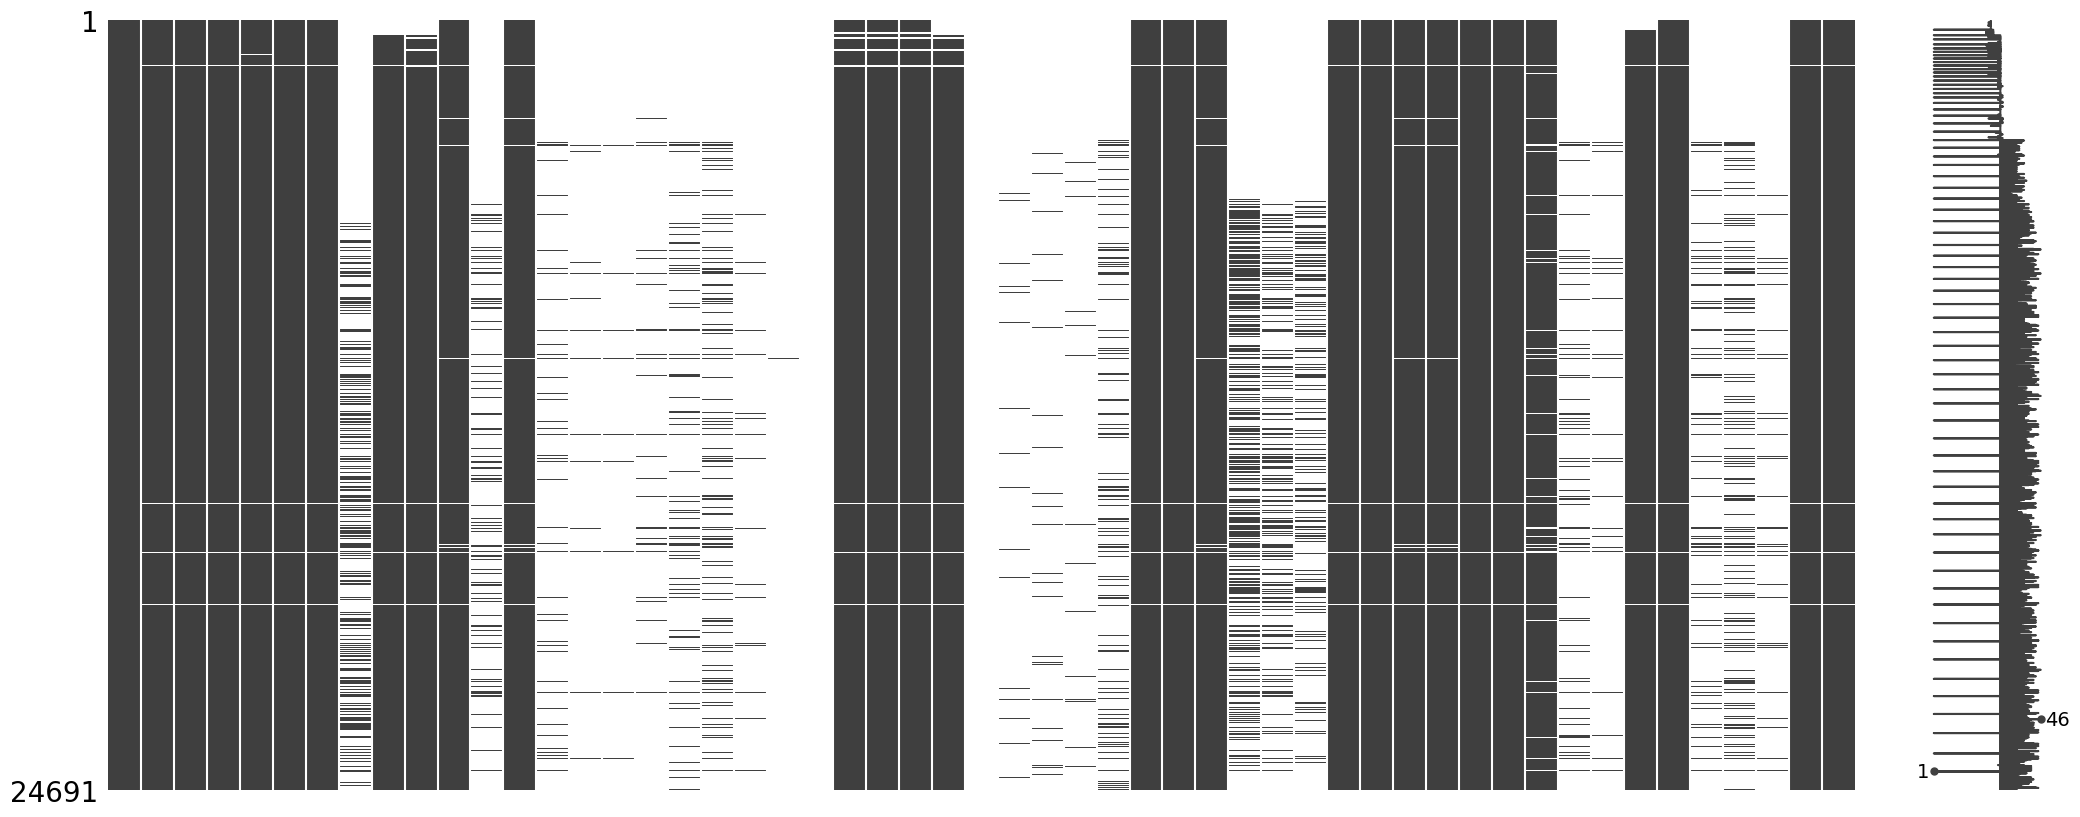

In [70]:
msno.matrix(Estadisticas)

### Responde
* Debemos borrar filas de `df_sts`?
* Debemos borrar columnas de `df_sts`?

Segun tu respuesta, realiza las modificaciones al dataframe.

### Respuesta
Si se deben de borrar filas, ya que podemos observar que en la gráfica de Missingno hay pequeñas lineas horizontales que nos indican que hay registros completamente vacios, por lo que esas filas se deben de eliminar.

Tambien hay un par de columnas las cuales no tienen ningun dato, por lo tambien será necesario eliminarlas para poder tener un dataframe mas limpio

In [77]:
#Eliminamos las columnas con unicamente datos nulos
Estadisticas = Estadisticas.dropna(axis=1, how='all')
#Eliminamso la primer columna X1
#Estadisticas = Estadisticas.drop('X1', axis=1)
#Eliminamos las filas con unicamente datos nulos
Estadisticas = Estadisticas.dropna(axis=0, how='all')
Estadisticas.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


<Axes: >

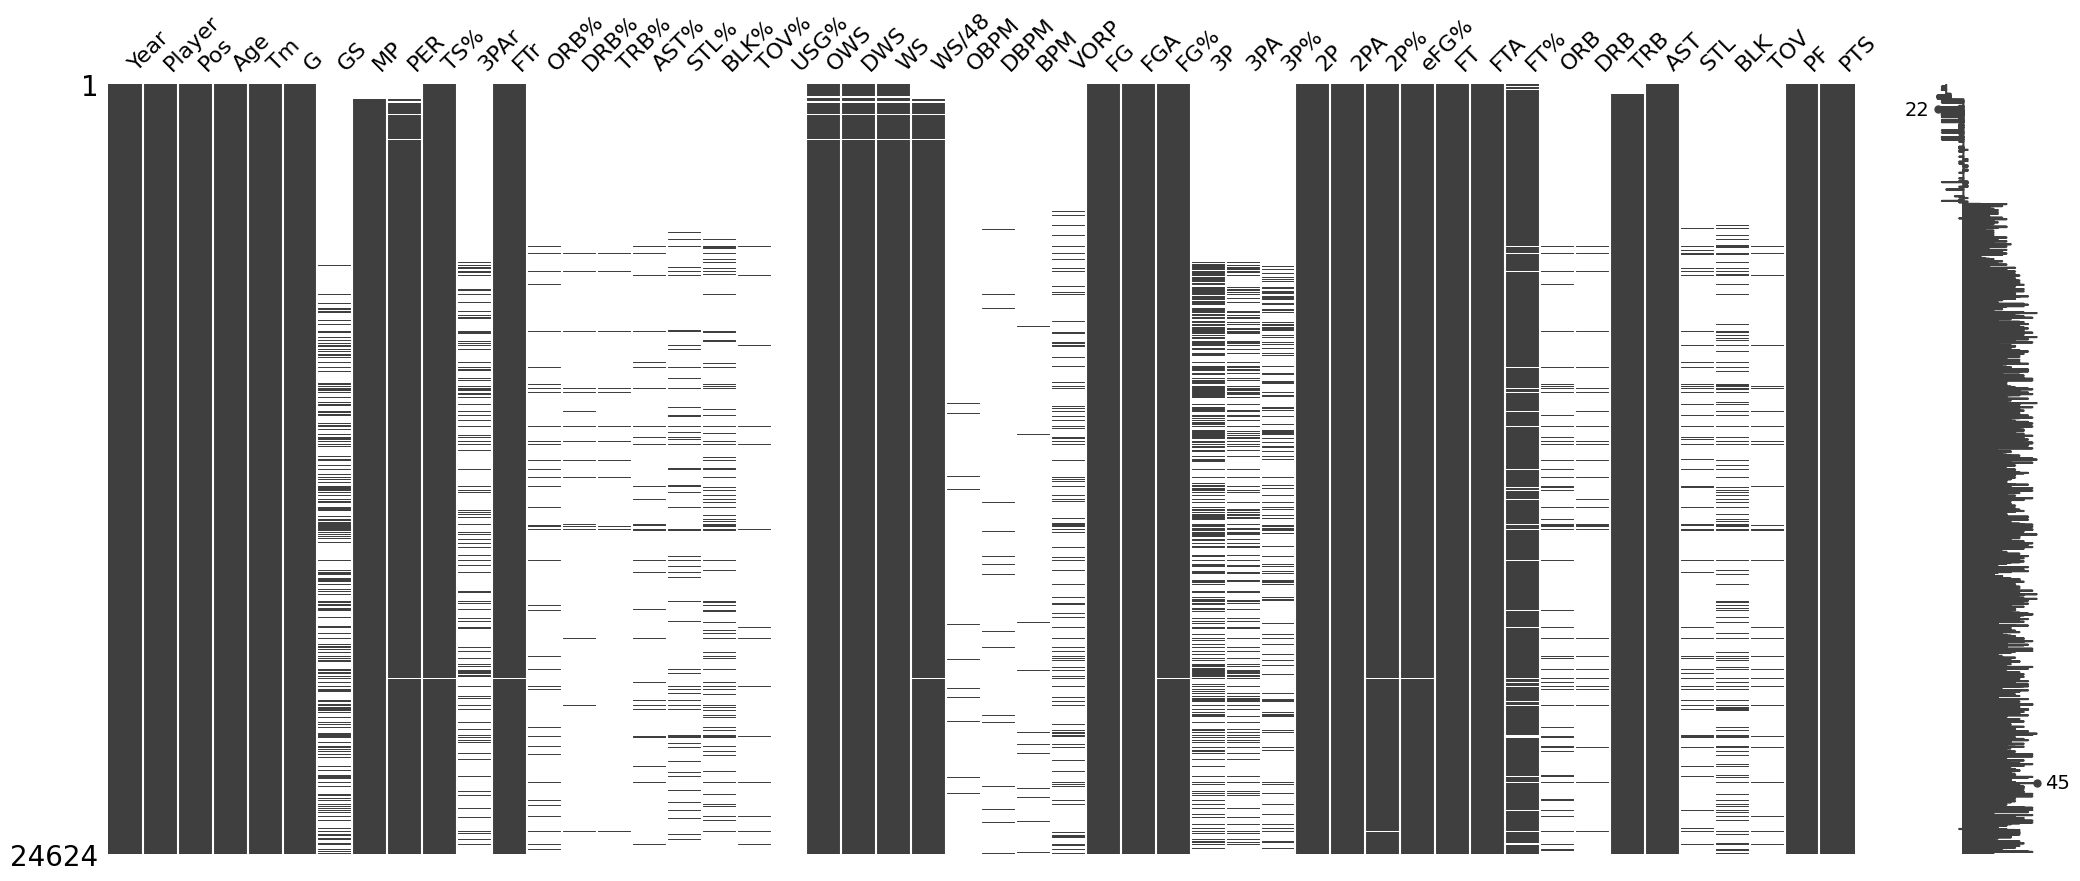

In [78]:
msno.matrix(Estadisticas)

Asi es como nos queda despues de la limpueza, hay columnas que tienen pocos registros, hay que ver que es lo que tienen para ver si valen la pena conservar

In [79]:
#Obtenemos la informacion de la columna TOV
Estadisticas['TOV'].describe()

count    930.000000
mean       0.448387
std        0.497597
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: TOV, dtype: float64

In [89]:
#Obtenemoos los registros NO nulos de la columna TOV
Estadisticas['TOV'].dropna().describe()


count    930.000000
mean       0.448387
std        0.497597
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: TOV, dtype: float64

Ok, podemos ver que hay 930 registros que no son nulos en esta columna y unicamente son 0 y 1, por lo que bajo mi criterio, no la deberíamos de borrar ya que puede ser información importante esos 930 registros y en un futuro nos puede ayudar

### Imputación
Despues de tratar nulos en el dataframe de estadísticas, analiza nuevamente y responde:
* Debemos imputar valores de `df_sts`?
* De ser el caso, cómo debemos imputar sus variables?

Segun tu respuesta, realiza las modificaciones al dataframe y muestra el resultado.

Al no tener conocimiento sobre que son las columnas, decidié no imputar, ya que esto puede llegar a perjudicar los cálculos que es hagan en un futuro y mi falta de conocimiento sobre las columnas me impide el tomar esta decisión, por lo que bajo un criterio unicamente numérico no impuatare, ya que ¿que tal que son datos que solamente algunos jugadores logran? Al imputarlo me causaría muchos conflictos mas adelante. 

Si bien es cierto que los datos de estas columnas son binarios nos puede llevar a pensar que 0 es no y uno si, pero que tal que unicamente ciertos jugadores son los que pueden entrar en ese conteo, por lo que a ellos se les asigna el null y al yo imputar los valores podría estar perdiendo la cuenta de cuantos son los 0 reales.